In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('application_record.csv')
df_1 = pd.read_csv('credit_record.csv')

In [3]:
df.head()
df_1.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [4]:
def round_nearest(x,num=100000):
    return int(round(float(x)/num)*num)

In [5]:
df['AMT_INCOME_TOTAL']=df['AMT_INCOME_TOTAL'].apply(round_nearest)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,438557.0,6.022176e+06,571637.023257,5008804.0,5609375.0,6047745.0,6456971.0,7999952.0
CNT_CHILDREN,438557.0,4.273903e-01,0.724882,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,438557.0,1.872071e+05,112500.532469,0.0,100000.0,200000.0,200000.0,6800000.0
DAYS_BIRTH,438557.0,-1.599790e+04,4185.030007,-25201.0,-19483.0,-15630.0,-12514.0,-7489.0
DAYS_EMPLOYED,438557.0,6.056368e+04,138767.799647,-17531.0,-3103.0,-1467.0,-371.0,365243.0
FLAG_MOBIL,438557.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,438557.0,2.061328e-01,0.404527,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,438557.0,2.877710e-01,0.452724,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,438557.0,1.082071e-01,0.310642,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,438557.0,2.194465e+00,0.897207,1.0,2.0,2.0,3.0,20.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  int64  
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [8]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [9]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [10]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1048575.0,5.068286e+06,46150.578505,5001711.0,5023644.0,5062104.0,5113856.0,5150487.0
MONTHS_BALANCE,1048575.0,-1.913700e+01,14.023498,-60.0,-29.0,-17.0,-7.0,0.0


In [11]:
def plot_features(features):
    for feature in features:
        plt.figure()
        ax=sns.countplot(y=df[feature], data=df)
        plt.legend(loc='best')
        total = len(df[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

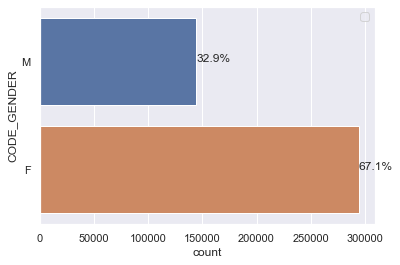

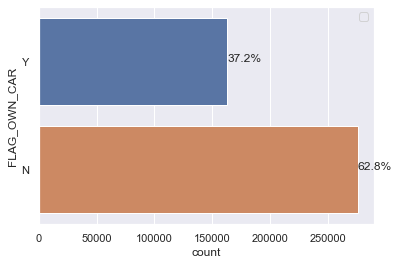

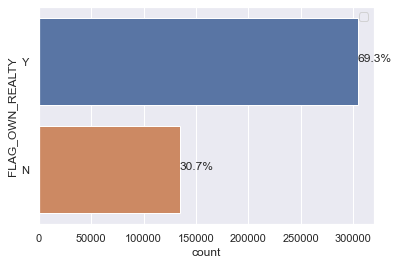

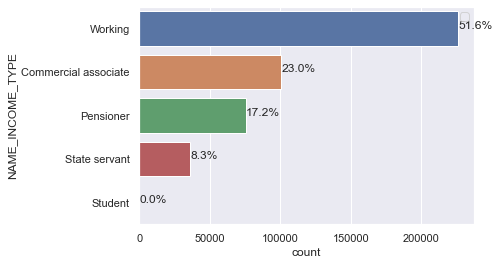

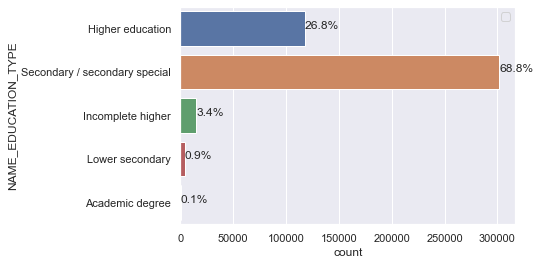

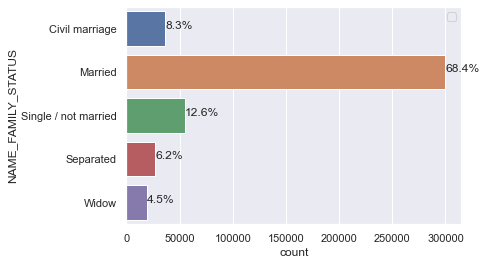

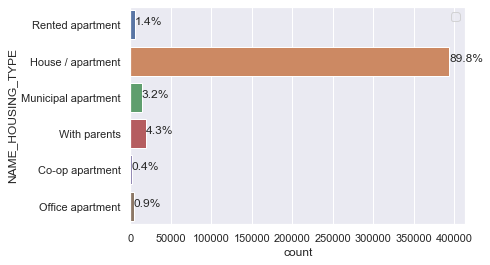

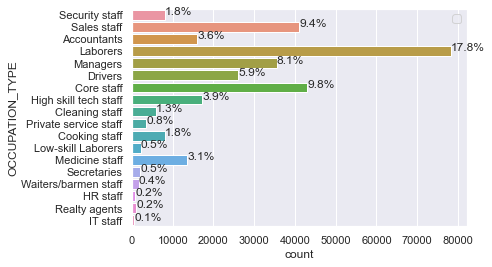

In [12]:
plot_features(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'])


In [13]:
def plot_credit_categories(data):
    for feature in data:
        plt.figure()
        ax=sns.countplot(y=df_1[feature], data=df_1)
        total = len(df_1[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

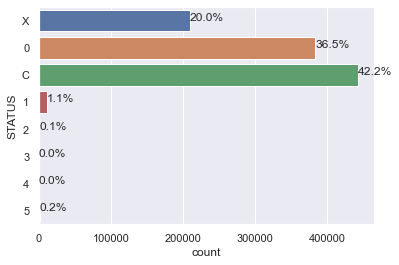

In [14]:
plot_credit_categories(['STATUS'])

In [15]:
df.dropna(axis =0, inplace=True)
df.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [16]:
df.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [17]:
df['AGE'] = np.ceil(pd.to_timedelta(df['DAYS_BIRTH'], unit='D').dt.days / -365.25)

In [18]:
df['AGE']

2         59.0
3         53.0
4         53.0
5         53.0
6         53.0
          ... 
438541    37.0
438548    35.0
438553    44.0
438554    23.0
438556    52.0
Name: AGE, Length: 304354, dtype: float64

In [19]:
df.drop('DAYS_BIRTH', axis=1, inplace=True)

In [20]:
df.loc[(df['DAYS_EMPLOYED'] > 0), 'DAYS_EMPLOYED'] = 0
df['YEARS_EMPLOYED'] = np.ceil(pd.to_timedelta(df['DAYS_EMPLOYED'], unit='D').dt.days / -365.25)

In [21]:
df['YEARS_EMPLOYED']

2         4.0
3         9.0
4         9.0
5         9.0
6         9.0
         ... 
438541    7.0
438548    6.0
438553    9.0
438554    2.0
438556    4.0
Name: YEARS_EMPLOYED, Length: 304354, dtype: float64

In [22]:
df.drop(['DAYS_EMPLOYED'], axis=1, inplace=True)

D:\python_jupyter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

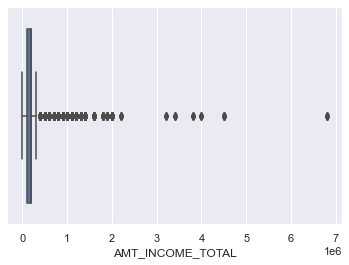

In [23]:
sns.boxplot(df['AMT_INCOME_TOTAL'])

D:\python_jupyter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE'>

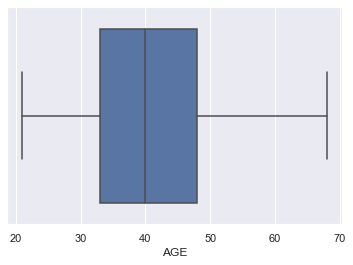

In [24]:
sns.boxplot(df['AGE'])

D:\python_jupyter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YEARS_EMPLOYED'>

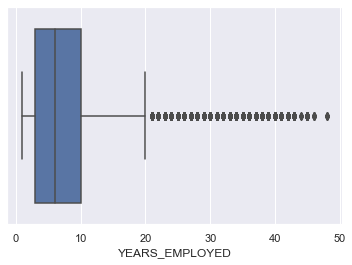

In [25]:
sns.boxplot(df['YEARS_EMPLOYED'])

In [26]:
df = df[df['YEARS_EMPLOYED']<=20]
# df.column

In [27]:
df = df[df['AMT_INCOME_TOTAL']<600000]

D:\python_jupyter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

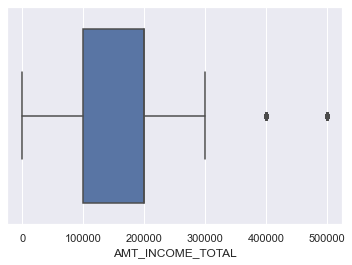

In [28]:
sns.boxplot(df['AMT_INCOME_TOTAL'])

D:\python_jupyter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YEARS_EMPLOYED'>

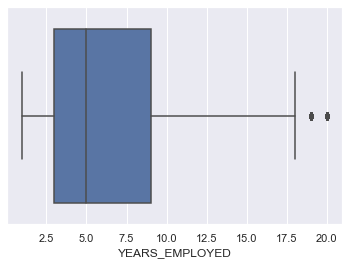

In [29]:
sns.boxplot(df['YEARS_EMPLOYED'])

In [30]:
def convert(features):
    for feature in features:
        feature_list = list(np.unique(df[feature]))
        feature_dict = {}
        for i in range(len(feature_list)):
                       feature_dict[feature_list[i]] = i
        df.replace({feature : feature_dict}, inplace=True)
        print(feature, '\n', feature_dict)

In [31]:
categorical_features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']
convert(categorical_features)

CODE_GENDER 
 {'F': 0, 'M': 1}
FLAG_OWN_CAR 
 {'N': 0, 'Y': 1}
FLAG_OWN_REALTY 
 {'N': 0, 'Y': 1}
NAME_INCOME_TYPE 
 {'Commercial associate': 0, 'Pensioner': 1, 'State servant': 2, 'Student': 3, 'Working': 4}
NAME_EDUCATION_TYPE 
 {'Academic degree': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3, 'Secondary / secondary special': 4}
NAME_FAMILY_STATUS 
 {'Civil marriage': 0, 'Married': 1, 'Separated': 2, 'Single / not married': 3, 'Widow': 4}
NAME_HOUSING_TYPE 
 {'Co-op apartment': 0, 'House / apartment': 1, 'Municipal apartment': 2, 'Office apartment': 3, 'Rented apartment': 4, 'With parents': 5}
OCCUPATION_TYPE 
 {'Accountants': 0, 'Cleaning staff': 1, 'Cooking staff': 2, 'Core staff': 3, 'Drivers': 4, 'HR staff': 5, 'High skill tech staff': 6, 'IT staff': 7, 'Laborers': 8, 'Low-skill Laborers': 9, 'Managers': 10, 'Medicine staff': 11, 'Private service staff': 12, 'Realty agents': 13, 'Sales staff': 14, 'Secretaries': 15, 'Security staff': 16, 'Waiters/barmen 

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283872 entries, 2 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   283872 non-null  int64  
 1   CODE_GENDER          283872 non-null  int64  
 2   FLAG_OWN_CAR         283872 non-null  int64  
 3   FLAG_OWN_REALTY      283872 non-null  int64  
 4   CNT_CHILDREN         283872 non-null  int64  
 5   AMT_INCOME_TOTAL     283872 non-null  int64  
 6   NAME_INCOME_TYPE     283872 non-null  int64  
 7   NAME_EDUCATION_TYPE  283872 non-null  int64  
 8   NAME_FAMILY_STATUS   283872 non-null  int64  
 9   NAME_HOUSING_TYPE    283872 non-null  int64  
 10  FLAG_MOBIL           283872 non-null  int64  
 11  FLAG_WORK_PHONE      283872 non-null  int64  
 12  FLAG_PHONE           283872 non-null  int64  
 13  FLAG_EMAIL           283872 non-null  int64  
 14  OCCUPATION_TYPE      283872 non-null  int64  
 15  CNT_FAM_MEMBERS  

In [33]:
convert_to = {'C' : 'Good', 'X' : 'Good', '0' : 'Bad', '1' : 'Bad', '2' : 'Bad', '3' : 'Bad', '4' : 'Bad', '5' : 'Bad'}
df_1.replace({'STATUS' : convert_to}, inplace=True)

In [34]:
df_1

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,Good
1,5001711,-1,Bad
2,5001711,-2,Bad
3,5001711,-3,Bad
4,5001712,0,Good
...,...,...,...
1048570,5150487,-25,Good
1048571,5150487,-26,Good
1048572,5150487,-27,Good
1048573,5150487,-28,Good


In [35]:
df_1 = df_1.value_counts(subset=['ID', 'STATUS']).unstack(fill_value=0)
df_1['QUANTITY']=(df_1['Bad']+df_1['Good'])/12

In [36]:
df_1

STATUS,Bad,Good,QUANTITY
ID,,,
5001711,3,1,0.333333
5001712,10,9,1.583333
5001713,0,22,1.833333
5001714,0,15,1.250000
5001715,0,60,5.000000
...,...,...,...
5150482,12,6,1.500000
5150483,0,18,1.500000
5150484,12,1,1.083333


In [37]:
df_1.loc[(df_1['Good'] >= 0), 'CREDIT_APPROVAL_STATUS'] = 1
df_1.loc[(df_1['Bad'] > 1), 'CREDIT_APPROVAL_STATUS'] = 0

In [38]:
df_1

STATUS,Bad,Good,QUANTITY,CREDIT_APPROVAL_STATUS
ID,,,,
5001711,3,1,0.333333,0.0
5001712,10,9,1.583333,0.0
5001713,0,22,1.833333,1.0
5001714,0,15,1.250000,1.0
5001715,0,60,5.000000,1.0
...,...,...,...,...
5150482,12,6,1.500000,0.0
5150483,0,18,1.500000,1.0
5150484,12,1,1.083333,0.0


In [39]:
df_1

STATUS,Bad,Good,QUANTITY,CREDIT_APPROVAL_STATUS
ID,,,,
5001711,3,1,0.333333,0.0
5001712,10,9,1.583333,0.0
5001713,0,22,1.833333,1.0
5001714,0,15,1.250000,1.0
5001715,0,60,5.000000,1.0
...,...,...,...,...
5150482,12,6,1.500000,0.0
5150483,0,18,1.500000,1.0
5150484,12,1,1.083333,0.0


In [40]:
df_1.drop(['Bad', 'Good'], axis=1, inplace=True)

In [41]:
df_1[['CREDIT_APPROVAL_STATUS']]

STATUS,CREDIT_APPROVAL_STATUS
ID,
5001711,0.0
5001712,0.0
5001713,1.0
5001714,1.0
5001715,1.0
...,...
5150482,0.0
5150483,1.0
5150484,0.0


In [42]:
data = df.merge(df_1, how='inner', on=['ID'])

In [43]:
data['M/Y'] = round(data['AMT_INCOME_TOTAL']/data['AGE'], 2)

In [44]:
data['YEARS_EMPLOYED'] = data['YEARS_EMPLOYED'].astype('int')

In [45]:
data['M/FM'] = round(data['AMT_INCOME_TOTAL']/data['CNT_FAM_MEMBERS'], 2)

In [46]:
data.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,QUANTITY,CREDIT_APPROVAL_STATUS,M/Y,M/FM
0,5008806,1,1,1,0,100000,4,4,1,1,...,0,0,16,2.0,59.0,4,2.500000,0.0,1694.92,50000.0
1,5008808,0,0,1,0,300000,0,4,3,1,...,1,1,14,1.0,53.0,9,0.416667,0.0,5660.38,300000.0
2,5008809,0,0,1,0,300000,0,4,3,1,...,1,1,14,1.0,53.0,9,0.416667,1.0,5660.38,300000.0
3,5008810,0,0,1,0,300000,0,4,3,1,...,1,1,14,1.0,53.0,9,2.250000,0.0,5660.38,300000.0
4,5008811,0,0,1,0,300000,0,4,3,1,...,1,1,14,1.0,53.0,9,3.250000,0.0,5660.38,300000.0
5,5008815,1,1,1,0,300000,4,1,1,1,...,1,1,0,2.0,47.0,3,0.500000,0.0,6382.98,150000.0
6,5112956,1,1,1,0,300000,4,1,1,1,...,1,1,0,2.0,47.0,3,3.583333,0.0,6382.98,150000.0
7,5008819,1,1,1,0,100000,0,4,1,1,...,0,0,8,2.0,49.0,4,0.666667,1.0,2040.82,50000.0
8,5008820,1,1,1,0,100000,0,4,1,1,...,0,0,8,2.0,49.0,4,0.750000,1.0,2040.82,50000.0
9,5008821,1,1,1,0,100000,0,4,1,1,...,0,0,8,2.0,49.0,4,0.750000,0.0,2040.82,50000.0


In [47]:
data = data.drop('ID', axis=1, inplace=False)

In [48]:
data

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,...,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,QUANTITY,CREDIT_APPROVAL_STATUS,M/Y,M/FM
0,1,1,1,0,100000,4,4,1,1,1,...,0,0,16,2.0,59.0,4,2.500000,0.0,1694.92,50000.0
1,0,0,1,0,300000,0,4,3,1,1,...,1,1,14,1.0,53.0,9,0.416667,0.0,5660.38,300000.0
2,0,0,1,0,300000,0,4,3,1,1,...,1,1,14,1.0,53.0,9,0.416667,1.0,5660.38,300000.0
3,0,0,1,0,300000,0,4,3,1,1,...,1,1,14,1.0,53.0,9,2.250000,0.0,5660.38,300000.0
4,0,0,1,0,300000,0,4,3,1,1,...,1,1,14,1.0,53.0,9,3.250000,0.0,5660.38,300000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23433,1,1,1,0,300000,4,4,1,1,1,...,0,0,10,2.0,48.0,7,1.000000,0.0,6250.00,150000.0
23434,0,0,1,0,200000,0,1,1,1,1,...,1,1,11,2.0,34.0,4,2.000000,0.0,5882.35,100000.0
23435,0,0,1,0,200000,1,1,1,1,1,...,1,1,11,2.0,34.0,4,2.750000,0.0,5882.35,100000.0
23436,0,0,1,0,300000,4,4,1,1,1,...,0,0,14,2.0,50.0,2,0.833333,0.0,6000.00,150000.0


In [49]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CODE_GENDER,23438.0,0.388813,0.487491,0.000000,0.00,0.00,1.000000,1.000000
FLAG_OWN_CAR,23438.0,0.427255,0.494690,0.000000,0.00,0.00,1.000000,1.000000
FLAG_OWN_REALTY,23438.0,0.652061,0.476327,0.000000,0.00,1.00,1.000000,1.000000
CNT_CHILDREN,23438.0,0.530037,0.797454,0.000000,0.00,0.00,1.000000,19.000000
AMT_INCOME_TOTAL,23438.0,187609.864323,88542.768456,0.000000,100000.00,200000.00,200000.000000,500000.000000
NAME_INCOME_TYPE,23438.0,2.683121,1.780980,0.000000,0.00,4.00,4.000000,4.000000
NAME_EDUCATION_TYPE,23438.0,3.057940,1.357586,0.000000,1.00,4.00,4.000000,4.000000
NAME_FAMILY_STATUS,23438.0,1.311076,0.891210,0.000000,1.00,1.00,1.000000,4.000000
NAME_HOUSING_TYPE,23438.0,1.331300,1.031617,0.000000,1.00,1.00,1.000000,5.000000
FLAG_MOBIL,23438.0,1.000000,0.000000,1.000000,1.00,1.00,1.000000,1.000000


In [50]:
data[data['CREDIT_APPROVAL_STATUS']==0].count()

CODE_GENDER               19129
FLAG_OWN_CAR              19129
FLAG_OWN_REALTY           19129
CNT_CHILDREN              19129
AMT_INCOME_TOTAL          19129
NAME_INCOME_TYPE          19129
NAME_EDUCATION_TYPE       19129
NAME_FAMILY_STATUS        19129
NAME_HOUSING_TYPE         19129
FLAG_MOBIL                19129
FLAG_WORK_PHONE           19129
FLAG_PHONE                19129
FLAG_EMAIL                19129
OCCUPATION_TYPE           19129
CNT_FAM_MEMBERS           19129
AGE                       19129
YEARS_EMPLOYED            19129
QUANTITY                  19129
CREDIT_APPROVAL_STATUS    19129
M/Y                       19129
M/FM                      19129
dtype: int64

In [51]:
data[data['CREDIT_APPROVAL_STATUS']==1].count()

CODE_GENDER               4309
FLAG_OWN_CAR              4309
FLAG_OWN_REALTY           4309
CNT_CHILDREN              4309
AMT_INCOME_TOTAL          4309
NAME_INCOME_TYPE          4309
NAME_EDUCATION_TYPE       4309
NAME_FAMILY_STATUS        4309
NAME_HOUSING_TYPE         4309
FLAG_MOBIL                4309
FLAG_WORK_PHONE           4309
FLAG_PHONE                4309
FLAG_EMAIL                4309
OCCUPATION_TYPE           4309
CNT_FAM_MEMBERS           4309
AGE                       4309
YEARS_EMPLOYED            4309
QUANTITY                  4309
CREDIT_APPROVAL_STATUS    4309
M/Y                       4309
M/FM                      4309
dtype: int64

In [52]:
data['M/YE'] = data['AMT_INCOME_TOTAL']/data['YEARS_EMPLOYED']

In [53]:
X = data.drop(['CREDIT_APPROVAL_STATUS'], axis=1)
y = data['CREDIT_APPROVAL_STATUS']
X.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'AGE', 'YEARS_EMPLOYED', 'QUANTITY', 'M/Y', 'M/FM',
       'M/YE'],
      dtype='object')

<AxesSubplot:>

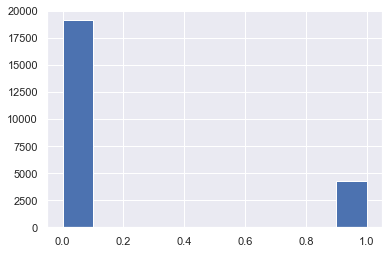

In [54]:
y.hist()

In [55]:
X

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,...,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,QUANTITY,M/Y,M/FM,M/YE
0,1,1,1,0,100000,4,4,1,1,1,...,0,0,16,2.0,59.0,4,2.500000,1694.92,50000.0,25000.000000
1,0,0,1,0,300000,0,4,3,1,1,...,1,1,14,1.0,53.0,9,0.416667,5660.38,300000.0,33333.333333
2,0,0,1,0,300000,0,4,3,1,1,...,1,1,14,1.0,53.0,9,0.416667,5660.38,300000.0,33333.333333
3,0,0,1,0,300000,0,4,3,1,1,...,1,1,14,1.0,53.0,9,2.250000,5660.38,300000.0,33333.333333
4,0,0,1,0,300000,0,4,3,1,1,...,1,1,14,1.0,53.0,9,3.250000,5660.38,300000.0,33333.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23433,1,1,1,0,300000,4,4,1,1,1,...,0,0,10,2.0,48.0,7,1.000000,6250.00,150000.0,42857.142857
23434,0,0,1,0,200000,0,1,1,1,1,...,1,1,11,2.0,34.0,4,2.000000,5882.35,100000.0,50000.000000
23435,0,0,1,0,200000,1,1,1,1,1,...,1,1,11,2.0,34.0,4,2.750000,5882.35,100000.0,50000.000000
23436,0,0,1,0,300000,4,4,1,1,1,...,0,0,14,2.0,50.0,2,0.833333,6000.00,150000.0,150000.000000


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)

<AxesSubplot:>

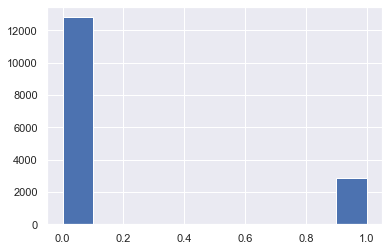

In [57]:
y_train.hist()

<AxesSubplot:>

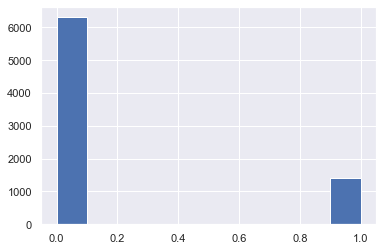

In [58]:
y_test.hist()

In [59]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score

In [60]:
n_e = [100, 150, 175, 190, 200, 225, 250]
# m_d = [100, 300, 500, 700, 900]
for j in n_e:
    model1 = RandomForestClassifier(n_estimators=j,random_state=1)
    model1.fit(X_train, y_train)
    roc_auc_rfc = roc_auc_score(y_true=y_test, y_score=model1.predict(X_test))
    print("ROC AUC score for RandomForestClassifier(n_estimators={0}): {1}".format(j, round(roc_auc_rfc, 5)))

ROC AUC score for RandomForestClassifier(n_estimators=100): 0.69095
ROC AUC score for RandomForestClassifier(n_estimators=150): 0.69111
ROC AUC score for RandomForestClassifier(n_estimators=175): 0.69084
ROC AUC score for RandomForestClassifier(n_estimators=190): 0.69017
ROC AUC score for RandomForestClassifier(n_estimators=200): 0.69236
ROC AUC score for RandomForestClassifier(n_estimators=225): 0.69052
ROC AUC score for RandomForestClassifier(n_estimators=250): 0.68958


In [61]:
model1 = RandomForestClassifier(random_state=42)

<AxesSubplot:>

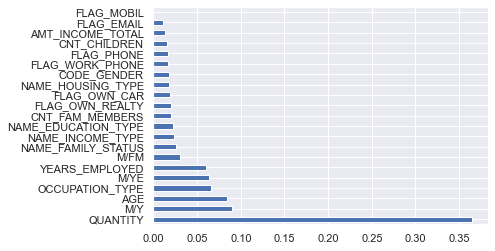

In [70]:
model1.fit(X_train, y_train)

model1.feature_importances_
(pd.Series(model1.feature_importances_, index=X.columns)
   .nlargest(len(model1.feature_importances_))
   .plot(kind='barh'))

In [63]:
roc_auc_rfc = roc_auc_score(y_true=y_test, y_score=model1.predict(X_test))

In [64]:
print("ROC AUC score for RandomForestClassifier: ", np.ceil(round(roc_auc_rfc, 1)*100)/100)

ROC AUC score for RandomForestClassifier:  0.7
